In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### contours
- 등치선
- 연속되는 점들로 동일한 색 또는 강도를 지님
- 이미지에서 동일한 색상값이나 강도값을 갖는 연속된 좌표의 리스트
##### 형태 분석, 물체 인식 및 인지에 사용
- apply threshold or canny edge detection before finding it
#### white object and black background!!!

In [14]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# (source, contour retrieval mode(추출방식), contour approximation)
# contours : np array of (x, y) coordinates of boundary points
print(image)

[array([[[286, 830]],

       [[286, 831]],

       [[285, 832]],

       [[285, 833]],

       [[284, 834]],

       [[284, 835]],

       [[282, 837]],

       [[282, 838]],

       [[283, 838]],

       [[283, 836]],

       [[284, 835]],

       [[284, 834]],

       [[285, 833]],

       [[285, 832]],

       [[286, 831]]], dtype=int32), array([[[129, 829]],

       [[129, 830]]], dtype=int32), array([[[280, 828]],

       [[278, 830]]], dtype=int32), array([[[131, 825]],

       [[131, 826]],

       [[130, 827]],

       [[131, 826]]], dtype=int32), array([[[281, 824]]], dtype=int32), array([[[146, 824]],

       [[145, 825]]], dtype=int32), array([[[283, 822]]], dtype=int32), array([[[303, 816]]], dtype=int32), array([[[198, 815]]], dtype=int32), array([[[264, 814]]], dtype=int32), array([[[203, 814]]], dtype=int32), array([[[304, 813]],

       [[304, 814]]], dtype=int32), array([[[200, 812]]], dtype=int32), array([[[126, 806]],

       [[126, 807]]], dtype=int32), array([[[12

### contour approximation method
- to save memory use cv.CHAIN_APPROX_SIMPLE
- the difference between NONE vs SIMPLE -> NONE saves whole points of image

### 등치선 그릴때

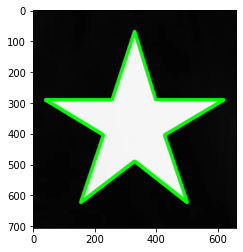

1


In [35]:
# cv.drawContours(image, contours, contourIdx, color, thick)
# contourIdx : 몇 번째 contours line을 그릴 것인지(-1 : 전체)

img = cv2.imread('/Users/sejongpyo/downloads/star.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# binary image transform
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
                            
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
con = cv2.drawContours(img, contours, -1, (0, 255, 0), 10)
plt.imshow(con)
plt.show()
print(len(contours))

- contours는 리스트 형태로 이어진 하나의 선이 각각 하나로 위의 예제에서는 총 13개가 있음

### moment
- center of mass of the object, area of the object etc.
1. image moment is a certain particular weighted average of the image pixels' intensities
2. useful to describe objects after segmentation


In [3]:
img = cv2.imread('/Users/sejongpyo/downloads/yubi.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print(M)
# m00 : 객체(등치선의 넓이)

{'m00': 2.0, 'm10': 378.0, 'm01': 1726.0, 'm20': 71442.33333333333, 'm11': 326214.0, 'm02': 1489538.3333333333, 'm30': 13502727.0, 'm21': 61654733.666666664, 'm12': 281522745.0, 'm03': 1285472157.0, 'mu20': 0.3333333333284827, 'mu11': 0.0, 'mu02': 0.3333333332557231, 'mu30': 1.862645149230957e-09, 'mu21': 1.7025740817189217e-09, 'mu12': 1.4668330550193787e-08, 'mu03': 2.384185791015625e-07, 'nu20': 0.08333333333212067, 'nu11': 0.0, 'nu02': 0.08333333331393078, 'nu30': 3.2927225399135965e-10, 'nu21': 3.0097541966397716e-10, 'nu12': 2.5930190001819573e-09, 'nu03': 4.2146848510894035e-08}


In [5]:
# cx : 무게 중심점
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
print('cx: ', cx)
print('cy: ', cy)

cx:  189
cy:  863


#### contour Area

In [8]:
# 객체의 넓이 == m00
area = cv2.contourArea(cnt)
print('area: ', area)

area:  2.0


### contour perimeter
- arc length

In [10]:
# 가장자리 길이
perimeter = cv2.arcLength(cnt, True)
print('perimeter: ', perimeter)

perimeter:  5.656854152679443


### contour approximation
- 등치선을 폐합하는 방식으로 계산
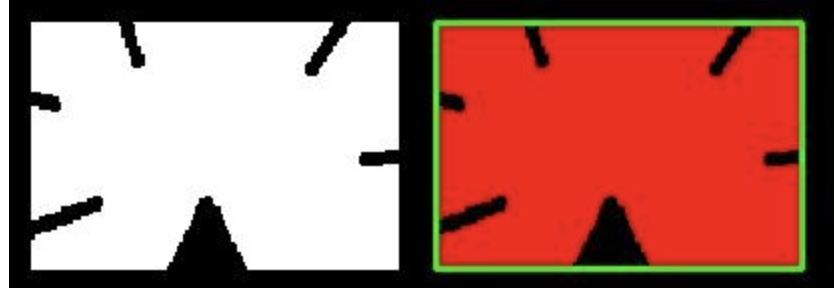

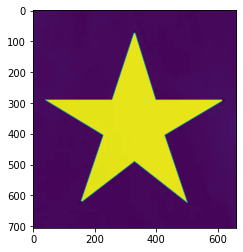

In [41]:
img_ba = cv2.imread('/Users/sejongpyo/downloads/star.png', 0)


ret, thresh = cv2.threshold(img_ba, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]

# 10%로 간략화된 기준
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

con = cv2.drawContours(img_ba, approx, -1, (0, 255, 0), 10)
plt.imshow(con)
plt.show()

### convex hull

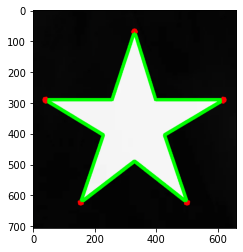

In [43]:
# 껍데기로 주변을 감싸줌

img_ba = cv2.imread('/Users/sejongpyo/downloads/star.png', 0)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

hull = cv2.convexHull(cnt)
con = cv2.drawContours(img, hull, -1, (255, 0, 0), 10)
plt.imshow(con)

- cv2.convexHull(points, hull, clockwise, returnPoints)
1. points : contours
2. hull : normally skip
3. clockwise : orientation flag -> True = clockwise
4. returnPoints : default = True
- True : returns the hull points 좌표
- False : hull point와 같은 contour point 지수

In [33]:
hull = cv2.convexHull(cnt, returnPoints = False)
hull_2 = cv2.convexHull(cnt, returnPoints = True)
print('hull:',hull)
print('hull_2:',hull_2)
# cnt[3] = [2612  627]
# cnt[0] = [ 791  627]

hull: [[3]
 [2]
 [1]
 [0]]
hull_2: [[[2612  627]]

 [[2612 2119]]

 [[ 791 2119]]

 [[ 791  627]]]


### straight bounding rectangle
- area of the bounding rectangle isn't always minimum

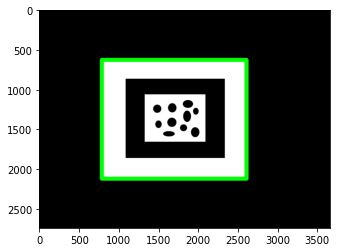

In [37]:
x, y, w, h = cv2.boundingRect(cnt)
straight_rect = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 50)

plt.imshow(straight_rect)

### rotated rectangle
#### 최소 넓이

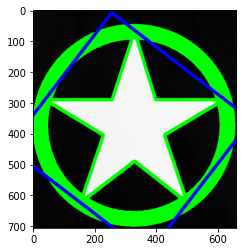

In [46]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect) # 4 corners of the rectangle
box = np.int0(box)
rot_rect = cv2.drawContours(img, [box], 0, (0, 0, 255), 10)

plt.imshow(rot_rect)

### minimum enclosing circle

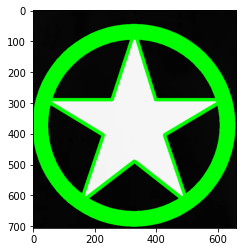

In [45]:
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)

circle = cv2.circle(img, center, radius, (0, 255, 0), 10)

plt.imshow(circle)

### fitting an ellipse

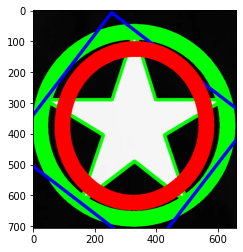

In [47]:
img_ba = cv2.imread('/Users/sejongpyo/downloads/star.png')

ellipse = cv2.fitEllipse(cnt)
ell = cv2.ellipse(img, ellipse, (255, 0, 0), 50)

plt.imshow(ell)

# 다섯개 이상의 점이 있어야함

### fitting a line
- line to a set of points

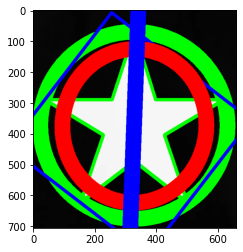

In [48]:
rows, cols = img.shape[:2]
[vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x * vy / vx) + y)
righty = int(((cols - x) * vy / vx) + y)
line = cv2.line(img, (cols - 1, righty), (0, lefty), (0, 0, 255), 50)

plt.imshow(line)

### contours properties

#### aspect ratio
- width / height

In [6]:
x, y, w, h = cv2.boundingRect(cnt)
aspect_ratio = float(w) / h
print(aspect_ratio)

1.0


#### extent
- 경계선의 넓이에 대한 객체의 실제 넓이 비율
- object area / bounding rectangle area

In [7]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print(extent)

0.2222222222222222


#### equivalent diameter
- 객체의 실제 면적과 동일한 면적을 갖는 원의 지름
- ((4 x contour area) / pi) ^ 1/2

In [9]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

1.5957691216057308


#### solidity
- 객체의 볼록껍질 면적에 대한 객체의 면적 비율
- contour area / convex hull area

In [11]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area) / hull_area
print(solidity)

1.0


#### orientation
- 객체가 놓여진 방향에 대한 각도

In [49]:
(x, y), (MA, ma), angle = cv2.fitEllipse(cnt)
print(angle)

4.5452070236206055


#### mask & pixel points
- 모든 포인트에 대한 정보

In [50]:
mask = np.zeros(imgray.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixelpoints1 = np.transpose(np.nonzero(mask))
pixelpoints2 = cv2.findNonZero(mask)

In [51]:
# 최대값, 최소값, 위치값

mask = np.zeros(imgray.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray, mask = mask)

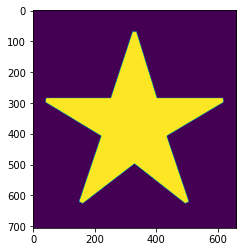

In [52]:
plt.imshow(mask)

In [23]:
# 마스크 이미지를 적용해 이미지 범위에 존재하는 픽셀의 평균 색상 또는 평균 강도 얻는 코드
mean_val = cv2.mean(img, mask = mask)

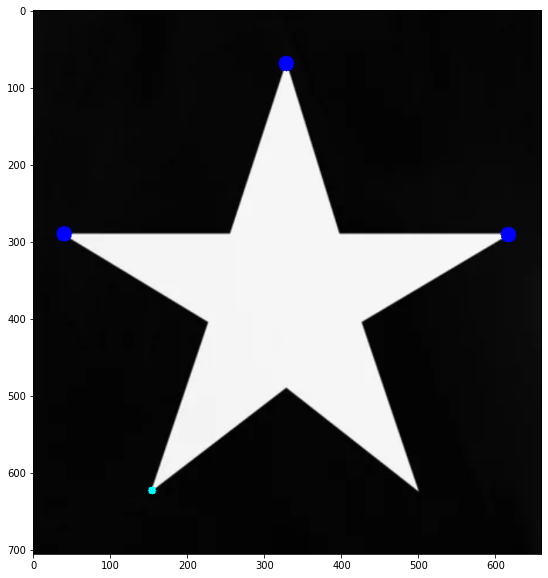

In [53]:
img = cv2.imread('/Users/sejongpyo/downloads/star.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
 
cnt = contours[0]
 
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

cv2.circle(img, leftmost, 10, (0,0,255), -1)
cv2.circle(img, rightmost, 10, (0,0,255), -1)
cv2.circle(img, topmost, 10, (0,0,255), -1)
cv2.circle(img, bottommost, 5, (0,255,255), -1)

f, ax = plt.subplots(figsize = (20, 10))
ax.imshow(img)

## contours : more functions

In [54]:
img = cv2.imread('/Users/sejongpyo/downloads/star.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
 
cnt = contours[0]

#### convexity defects
- deviation of the object from 'hull' can be considered as convexity defect